In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [154]:
df_drug = pd.read_csv(r"C:\Users\HP\Downloads\drug200.csv")

In [155]:
# 👉 Read the first 6 rows in the dataset.
df_drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [156]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [157]:
df_drug.Drug.value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [158]:
df_drug.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [159]:
df_drug.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [160]:
df_drug.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [161]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [162]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [163]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\Users\HP\AppData\Local\Temp\ipykernel_23816\3287353069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Age']);
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


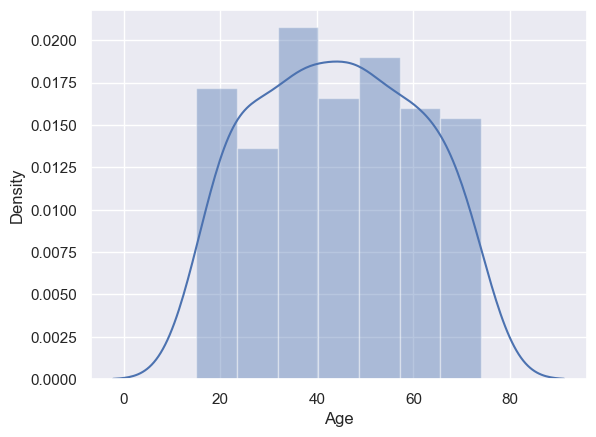

In [164]:
sns.distplot(df_drug['Age']);


C:\Users\HP\AppData\Local\Temp\ipykernel_23816\2008204568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_drug['Na_to_K']);
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


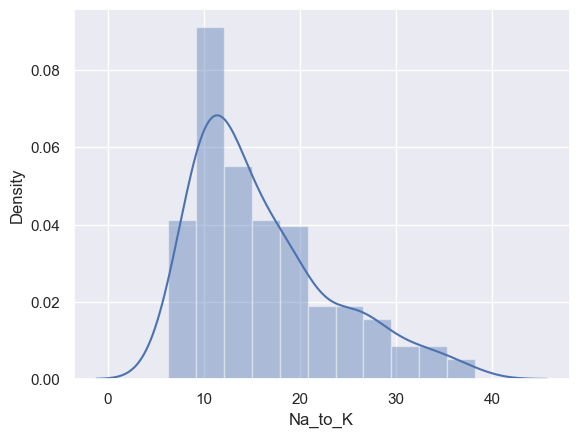

In [165]:
sns.distplot(df_drug['Na_to_K']);

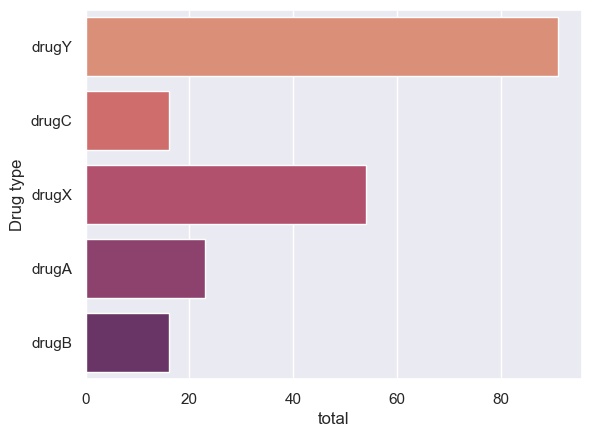

In [166]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df_drug, palette = "flare")
plt.ylabel("Drug type")
plt.xlabel("total")
plt.show()

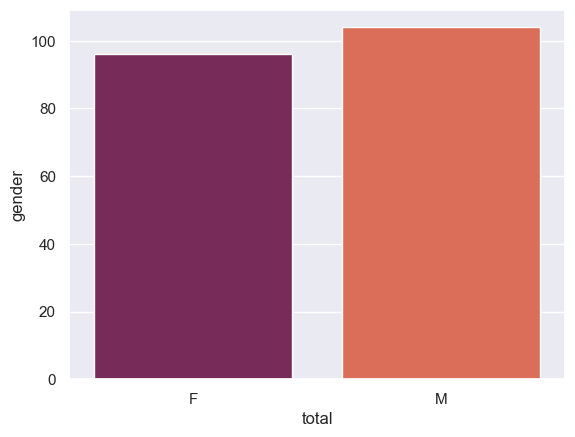

In [167]:
sns.set_theme(style='darkgrid')
sns.countplot(x="Sex", data=df_drug, palette= "rocket")
plt.ylabel("gender")
plt.xlabel("total")
plt.show()


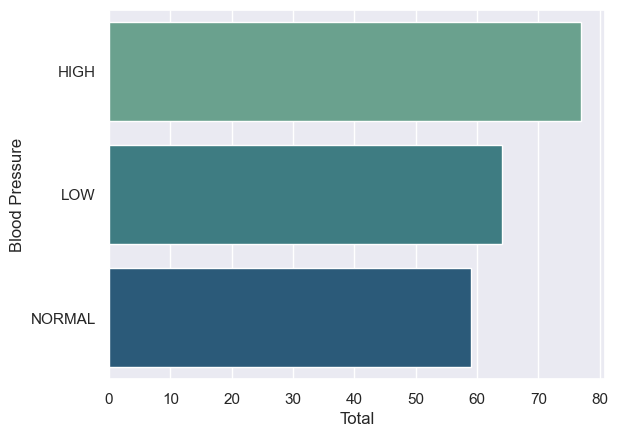

In [168]:
sns.set_theme(style="darkgrid")
sns.countplot(y = "BP", data=df_drug, palette="crest")
plt.ylabel("Blood Pressure")
plt.xlabel("Total")
plt.show()
     

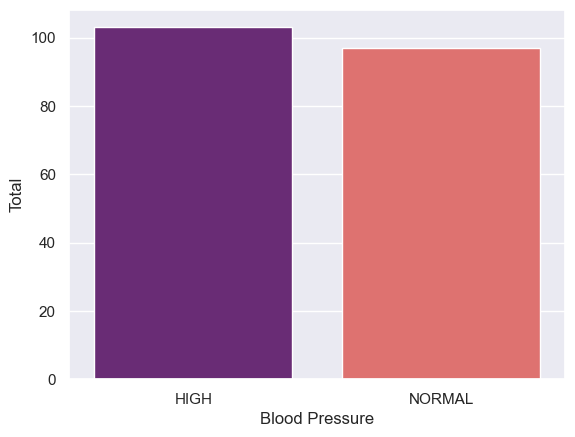

In [169]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df_drug, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

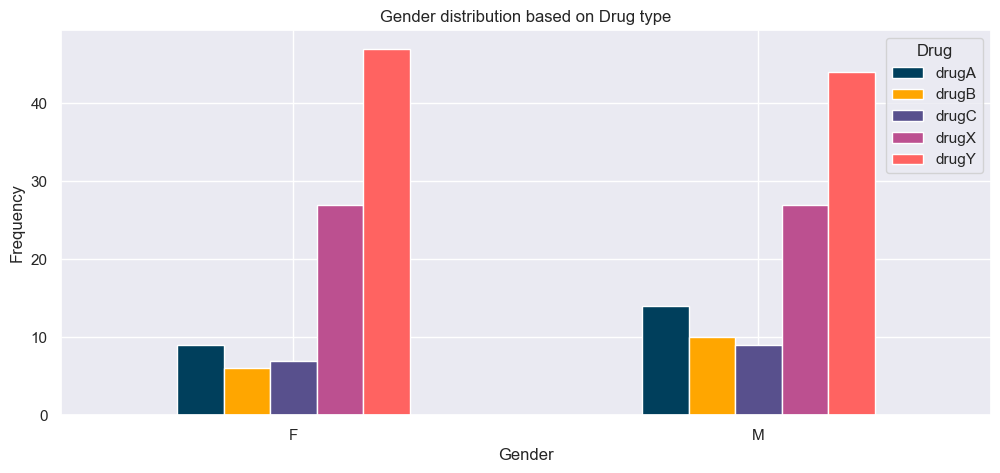

In [170]:
pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()
     


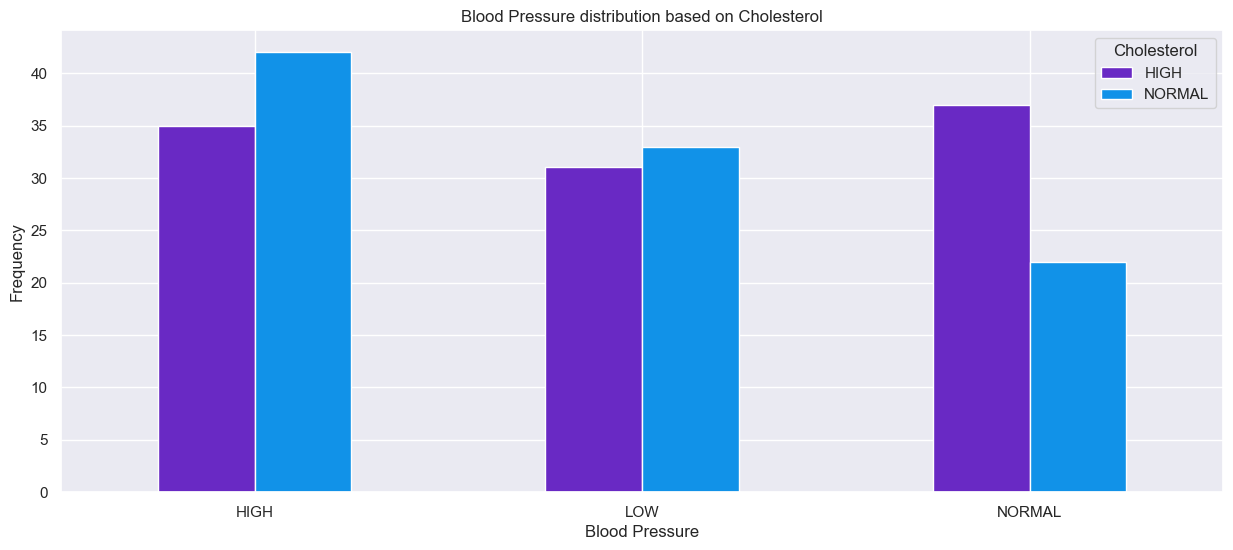

In [171]:

pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

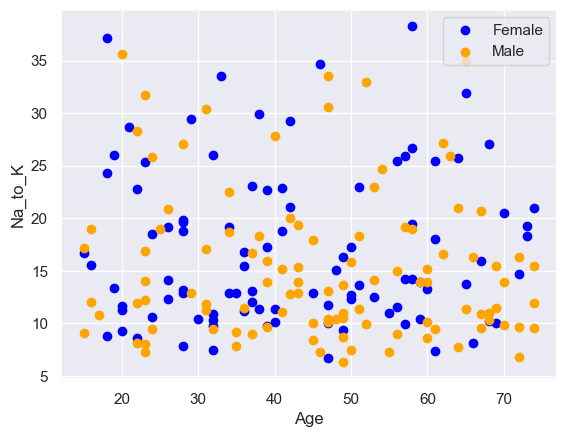

In [172]:

plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [173]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Age'], axis = 1)

In [174]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['Na_to_K'], axis = 1)

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [176]:
X = df_drug.drop(["Drug"], axis=1)
y = df_drug["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
     

In [177]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [178]:
df = pd.DataFrame(X_train)
df = df.astype(int)
print(df)


     Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
131      0      1        0       1          0                 0   
96       1      0        0       1          0                 1   
181      1      0        0       0          1                 1   
19       1      0        1       0          0                 0   
153      1      0        0       1          0                 0   
..     ...    ...      ...     ...        ...               ...   
67       0      1        0       0          1                 0   
192      0      1        0       1          0                 1   
117      1      0        0       0          1                 1   
47       0      1        0       1          0                 1   
172      1      0        0       0          1                 0   

     Cholesterol_NORMAL  Age_binned_<20s  Age_binned_20s  Age_binned_30s  \
131                   1                0               0               0   
96                    0                0   

In [179]:
df.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [180]:
from imblearn.over_sampling import SMOTE
df, y_train = SMOTE().fit_resample(df, y_train)


In [181]:
# # Check for missing values
# if np.any(np.isnan(X_train)):
#     # Handle missing values, for example by imputing or removing them
#     from sklearn.impute import SimpleImputer
    
#     imputer = SimpleImputer(strategy='mean')  # Or use another strategy
#     X_train = imputer.fit_transform(X_train)


In [182]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to resample the data
# X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)


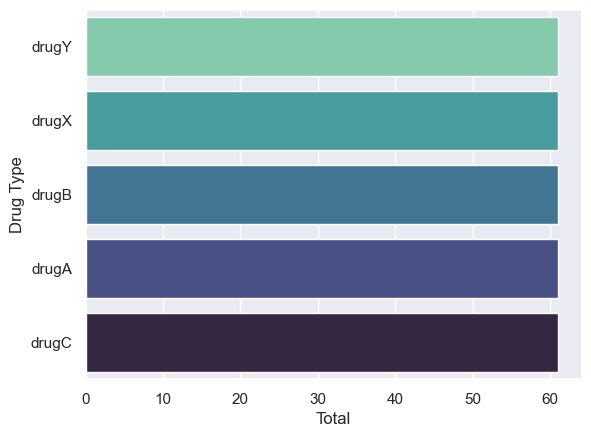

In [183]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

## Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(df, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.70      0.82        30

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 2  1  2  4 21]]
Logistic Regression accuracy is: 85.00%


## K Neighbours

In [185]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(df, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))


              precision    recall  f1-score   support

       drugA       0.33      0.80      0.47         5
       drugB       0.33      0.67      0.44         3
       drugC       0.50      1.00      0.67         4
       drugX       0.69      1.00      0.82        18
       drugY       1.00      0.27      0.42        30

    accuracy                           0.60        60
   macro avg       0.57      0.75      0.56        60
weighted avg       0.79      0.60      0.56        60

[[ 4  1  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 7  3  4  8  8]]
K Neighbours accuracy is: 60.00%


## Categorical NB

In [186]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(df, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.67      0.80        30

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  1  2  4 20]]
Naive Bayes accuracy is: 83.33%


## Decision Tree

In [187]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(df, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       drugA       0.43      0.60      0.50         5
       drugB       0.38      1.00      0.55         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18
       drugY       1.00      0.57      0.72        30

    accuracy                           0.75        60
   macro avg       0.66      0.83      0.69        60
weighted avg       0.84      0.75      0.75        60

[[ 3  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 4  3  2  4 17]]
Decision Tree accuracy is: 75.00%


## Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(df, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))
     

              precision    recall  f1-score   support

       drugA       0.57      0.80      0.67         5
       drugB       0.50      1.00      0.67         3
       drugC       0.57      1.00      0.73         4
       drugX       0.78      1.00      0.88        18
       drugY       1.00      0.57      0.72        30

    accuracy                           0.77        60
   macro avg       0.69      0.87      0.73        60
weighted avg       0.85      0.77      0.76        60

[[ 4  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 3  2  3  5 17]]
Random Forest accuracy is: 76.67%


In [189]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors','Categorical NB','Decision Tree', 'Random Forest'],
                        'Accuracy': [LRAcc*100, KNAcc*100, NBAcc1*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,85.000000
2,Categorical NB,83.333333
4,Random Forest,76.666667
3,Decision Tree,75.000000
1,K Neighbors,60.000000


In [190]:
print(X_test.columns)

     

Index(['Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL', 'Age_binned_<20s', 'Age_binned_20s',
       'Age_binned_30s', 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s',
       'Age_binned_>60s', 'Na_to_K_binned_<10', 'Na_to_K_binned_10-20',
       'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'],
      dtype='object')


In [191]:
# import pandas as pd

# # Predict using your model (assuming NBclassifier1 is already trained)
# pred_lr = NBclassifier1.predict(X_test)

# # Check the columns of X_test
# print("Columns in X_test:", X_test.columns)

# # Initialize prediction as None
# prediction = None

# # Create a dictionary for the DataFrame
# try:
#     data = {col: X_test.loc[:, col] for col in X_test.columns if col.startswith(('Sex_', 'BP_', 'Cholesterol_', 'Age_binned_', 'Na_to_K_binned_'))}
#     data['DrugType'] = pred_lr
#     prediction = pd.DataFrame(data)
# except KeyError as e:
#     print(f"KeyError: {e}")

# if prediction is not None:
#     print(prediction.head())
# else:
#     print("Prediction DataFrame was not created due to a KeyError.")



In [192]:
pred_lr = NBclassifier1.predict(X_test)
prediction = pd.DataFrame({'Sex_F': X_test.loc[:,"Sex_F"],
                           'Sex_M': X_test.loc[:,"Sex_M"],
                           'BP_HIGH': X_test.loc[:,"BP_HIGH"],
                           'BP_LOW': X_test.loc[:,"BP_LOW"],
                           'BP_NORMAL': X_test.loc[:,"BP_NORMAL"],
                           'Cholesterol_HIGH': X_test.loc[:,"Cholesterol_HIGH"],
                           'Cholesterol_NORMAL': X_test.loc[:,"Cholesterol_NORMAL"],
                           'Age_binned_<20s': X_test.loc[:,"Age_binned_<20s"],
                           'Age_binned_20s': X_test.loc[:,"Age_binned_20s"],
                           'Age_binned_30s': X_test.loc[:,"Age_binned_30s"],
                           'Age_binned_40s': X_test.loc[:,"Age_binned_40s"],
                           'Age_binned_50s': X_test.loc[:,"Age_binned_50s"],
                           'Age_binned_60s': X_test.loc[:,"Age_binned_60s"],
                           'Age_binned_>60s': X_test.loc[:,"Age_binned_>60s"],
                           'Na_to_K_binned_<10': X_test.loc[:,"Na_to_K_binned_<10"],
                           'Na_to_K_binned_10-20': X_test.loc[:,"Na_to_K_binned_10-20"],
                           'Na_to_K_binned_20-30': X_test.loc[:,"Na_to_K_binned_20-30"],
                           'Na_to_K_binned_>30': X_test.loc[:,"Na_to_K_binned_>30"],'DrugType': pred_lr})
     

In [193]:

# Sex
prediction['Sex_F'] = prediction['Sex_F'].replace([True,False],['Female', 'Male'])

#BP
prediction['BP_HIGH'] = prediction['BP_HIGH'].replace([True,False],['High',''])
prediction['BP_LOW'] = prediction['BP_LOW'].replace([True,False],['Low', ''])
prediction['BP_NORMAL'] = prediction['BP_NORMAL'].replace([True,False],['Normal', ''])

prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_LOW'], prediction['BP_HIGH'])
prediction['BP_HIGH'] = np.where((prediction['BP_HIGH'] == ''), prediction['BP_NORMAL'], prediction['BP_HIGH'])

#Cholestrol
prediction['Cholesterol_HIGH'] = prediction['Cholesterol_HIGH'].replace([True,False],['High', 'Normal'])

#Age_binned
prediction['Age_binned_<20s'] = prediction['Age_binned_<20s'].replace([True,False],['<20s',''])
prediction['Age_binned_20s'] = prediction['Age_binned_20s'].replace([True,False],['20s',''])
prediction['Age_binned_30s'] = prediction['Age_binned_30s'].replace([True,False],['30s',''])
prediction['Age_binned_40s'] = prediction['Age_binned_40s'].replace([True,False],['40s',''])
prediction['Age_binned_50s'] = prediction['Age_binned_50s'].replace([True,False],['50s',''])
prediction['Age_binned_60s'] = prediction['Age_binned_60s'].replace([True,False],['60s',''])
prediction['Age_binned_>60s'] = prediction['Age_binned_>60s'].replace([True,False],['>60s',''])

prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_20s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_30s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_40s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_50s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_60s'], prediction['Age_binned_<20s'])
prediction['Age_binned_<20s'] = np.where((prediction['Age_binned_<20s'] == ''), prediction['Age_binned_>60s'], prediction['Age_binned_<20s'])

#Na to K
prediction['Na_to_K_binned_<10'] = prediction['Na_to_K_binned_<10'].replace([True,False],['<10',''])
prediction['Na_to_K_binned_10-20'] = prediction['Na_to_K_binned_10-20'].replace([True,False],['10-20',''])
prediction['Na_to_K_binned_20-30'] = prediction['Na_to_K_binned_20-30'].replace([True,False],['20-30',''])
prediction['Na_to_K_binned_>30'] = prediction['Na_to_K_binned_>30'].replace([True,False],['>30s',''])

prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_10-20'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_20-30'], prediction['Na_to_K_binned_<10'])
prediction['Na_to_K_binned_<10'] = np.where((prediction['Na_to_K_binned_<10'] == ''), prediction['Na_to_K_binned_>30'], prediction['Na_to_K_binned_<10'])

# Drop columns
prediction = prediction.drop(['Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL', 'Age_binned_20s', 'Age_binned_30s',
                 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
                'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'], axis = 1)

# Ensure the prediction DataFrame is created with correct columns
prediction.head()


,Sex_F,BP_HIGH,Cholesterol_HIGH,Age_binned_<20s,Na_to_K_binned_<10,DrugType
18,Male,Low,High,20s,<10,drugC
170,Female,Normal,High,20s,10-20,drugX
107,Male,Low,High,40s,20-30,drugY
98,Male,High,Normal,20s,>30s,drugY
177,Male,Normal,High,20s,20-30,drugY


In [194]:
# import pandas as pd
# import numpy as np

# # Example prediction DataFrame (replace with your actual DataFrame)
# # prediction = pd.read_csv('path_to_your_csv_file')

# # Sex
# prediction['Sex'] = prediction['Sex_F'].replace({1: 'Female', 0: 'Male'})

# # BP
# prediction['BP'] = prediction[['BP_HIGH', 'BP_LOW', 'BP_NORMAL']].idxmax(axis=1)
# prediction['BP'] = prediction['BP'].map({'BP_HIGH': 'High', 'BP_LOW': 'Low', 'BP_NORMAL': 'Normal'})

# # Cholesterol
# prediction['Cholesterol'] = prediction['Cholesterol_HIGH'].replace({1: 'High', 0: 'Normal'})

# # Age_binned
# age_mapping = {
#     'Age_binned_<20s': '<20s',
#     'Age_binned_20s': '20s',
#     'Age_binned_30s': '30s',
#     'Age_binned_40s': '40s',
#     'Age_binned_50s': '50s',
#     'Age_binned_60s': '60s',
#     'Age_binned_>60s': '>60s'
# }
# prediction['Age_binned'] = prediction[list(age_mapping.keys())].idxmax(axis=1).map(age_mapping)

# # Na to K
# na_to_k_mapping = {
#     'Na_to_K_binned_<10': '<10',
#     'Na_to_K_binned_10-20': '10-20',
#     'Na_to_K_binned_20-30': '20-30',
#     'Na_to_K_binned_>30': '>30'
# }
# prediction['Na_to_K_binned'] = prediction[list(na_to_k_mapping.keys())].idxmax(axis=1).map(na_to_k_mapping)

# # Drop the original columns that are now combined
# columns_to_drop = ['Sex_F', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL'] + list(age_mapping.keys()) + list(na_to_k_mapping.keys())
# prediction.drop(columns=columns_to_drop, inplace=True)

# # Display the cleaned prediction DataFrame
# print(prediction.head())

# # Save to CSV
# prediction.to_csv('prediction.csv', index=False)

# # Read and display the CSV to verify
# predictioncsv = pd.read_csv('./prediction.csv')
# print(predictioncsv.head())


In [195]:
new_name = {'Sex_F': 'Sex', 'BP_HIGH': 'BP', 'Cholesterol_HIGH': 'Cholesterol', 'Age_binned_<20s': 'Age_binned',
          'Na_to_K_binned_<10': 'Na_to_K_binned'}
prediction.rename(columns=new_name, inplace=True)

In [196]:
prediction.to_csv('prediction.csv', index=False)
predictioncsv = pd.read_csv('./prediction.csv')
predictioncsv.head()



,Sex,BP,Cholesterol,Age_binned,Na_to_K_binned,DrugType
0,Male,Low,High,20s,<10,drugC
1,Female,Normal,High,20s,10-20,drugX
2,Male,Low,High,40s,20-30,drugY
3,Male,High,Normal,20s,>30s,drugY
4,Male,Normal,High,20s,20-30,drugY
